In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm 
from statsmodels.graphics.mosaicplot import mosaic


# Introduction

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX: Gender (1 = male; 2 = female).
- EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 0 = the repayment status in September, 2005; 2 = the repayment status in August, 2005; . . .;6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). 1 = amount of bill statement in September, 2005; 2 = amount of bill statement in August, 2005; . . .; 6 = amount of bill statement in April, 2005. 
- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). 1 = amount paid in September, 2005; 2 = amount paid in August, 2005; . . .;6 = amount paid in April, 2005.

In [394]:
df = pd.read_csv('Datasets/Credit.csv')

display(df)
df.shape

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


(30000, 25)

In [395]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5921.163500,5225.681500,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,23040.870402,17606.961470,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1684259.000000,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# Data cleaning preparation

In order to get a cleaner read on the effects of the explanatory variables, the following modifications were applied:

### Consolidation of bill amounts and pay amounts

The original dataset contained one separate column for each pay and bill amount, starting at the most recent and spanning 6 months of history. In an attempt to quantify the effect of payment amounts and bill amounts as unitary variables, a weighted average was calculated for each subject, using a linear decay factor (highest weight for most recent).

In [396]:
# Define the columns
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Method 1: Linear decay weights (most recent gets highest weight)
# Weights: [6, 5, 4, 3, 2, 1] for [AMT1, AMT2, AMT3, AMT4, AMT5, AMT6]
linear_weights = np.array([6, 5, 4, 3, 2, 1])
linear_weights = linear_weights / linear_weights.sum()  # Normalize to sum to 1

print("Linear weights:", linear_weights)

# Calculate weighted averages
df['WEIGHTED_BILL_AMT'] = np.average(df[bill_columns], weights=linear_weights, axis=1)
df['WEIGHTED_PAY_AMT'] = np.average(df[pay_columns], weights=linear_weights, axis=1)

df.head()


Linear weights: [0.285714 0.238095 0.190476 0.142857 0.095238 0.047619]


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,WEIGHTED_BILL_AMT,WEIGHTED_PAY_AMT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1987.809524,164.047619
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,2639.619048,666.666667
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,18487.761905,1457.523810
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,42508.380952,1587.285714
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,16363.571429,12593.428571


### Segmentification of certain continuous variables into contiguous segments

The effect of certain continuous variables being hard to interpret because of the small size of the granularity, the following variables were consolidated into a reduced number of contiguous blocks:
- AGE
- LIMIT_BAL
- WEIGHTED_BILL_AMT
- WEIGHTED_PAY_AMT

The boundaries between the blocks were made to match the quartiles for each series.

In [397]:
import pandas as pd
import numpy as np

def create_numeric_percentile_bins(df, column_name, num_bins=4):
    """
    Create percentile bins with ascending numeric codes (1, 2, 3, 4)
    """
    # Create percentile bins and assign numeric labels
    binned_column = pd.qcut(df[column_name], q=num_bins, labels=range(1, num_bins + 1), duplicates='drop')
    
    # Get the actual bin edges for reference
    _, bin_edges = pd.qcut(df[column_name], q=num_bins, retbins=True, duplicates='drop')
    
    return binned_column.astype(int), bin_edges

# Apply numeric percentile binning
variables_to_bin = ['AGE', 'LIMIT_BAL', 'WEIGHTED_BILL_AMT', 'WEIGHTED_PAY_AMT']

print("Creating numeric percentile-based bins (1=lowest quartile, 4=highest quartile)...")
print("=" * 80)

for var in variables_to_bin:
    # Create numeric bins
    binned_col, edges = create_numeric_percentile_bins(df, var, num_bins=4)
    
    # Add the binned column to dataframe
    df[f'{var}_Q'] = binned_col
    
    # Print bin information
    print(f"\n{var}_Q:")
    print(f"  Overall range: {df[var].min():.2f} to {df[var].max():.2f}")
    print(f"  Quartile boundaries and coding:")
    
    for i in range(len(edges) - 1):
        quartile_num = i + 1
        start_val = edges[i]
        end_val = edges[i + 1]
        count = (df[f'{var}_Q'] == quartile_num).sum()
        percentage = count / len(df) * 100
        
        print(f"    {quartile_num}: {start_val:8.2f} to {end_val:8.2f} | {count:,} obs ({percentage:.1f}%)")
    
    # Show the numeric distribution
    print(f"  Value counts: {dict(df[f'{var}_Q'].value_counts().sort_index())}")

Creating numeric percentile-based bins (1=lowest quartile, 4=highest quartile)...

AGE_Q:
  Overall range: 21.00 to 79.00
  Quartile boundaries and coding:
    1:    21.00 to    28.00 | 8,013 obs (26.7%)
    2:    28.00 to    34.00 | 7,683 obs (25.6%)
    3:    34.00 to    41.00 | 6,854 obs (22.8%)
    4:    41.00 to    79.00 | 7,450 obs (24.8%)
  Value counts: {1: np.int64(8013), 2: np.int64(7683), 3: np.int64(6854), 4: np.int64(7450)}

LIMIT_BAL_Q:
  Overall range: 10000.00 to 1000000.00
  Quartile boundaries and coding:
    1: 10000.00 to 50000.00 | 7,676 obs (25.6%)
    2: 50000.00 to 140000.00 | 7,614 obs (25.4%)
    3: 140000.00 to 240000.00 | 7,643 obs (25.5%)
    4: 240000.00 to 1000000.00 | 7,067 obs (23.6%)
  Value counts: {1: np.int64(7676), 2: np.int64(7614), 3: np.int64(7643), 4: np.int64(7067)}

WEIGHTED_BILL_AMT_Q:
  Overall range: -29464.95 to 873217.38
  Quartile boundaries and coding:
    1: -29464.95 to  4888.90 | 7,500 obs (25.0%)
    2:  4888.90 to 21980.29 | 7,500


### Separation between training set and testing set


In order to evaluate the effectiveness of the logistic regression, we will subdivide the data into two parts:
- a training sample containing 70% of samples from the original dataset selected at random
- a testing sample containing the remaining 30% of the samples

In [398]:
train_df = df.sample(frac=0.7, random_state=42)
test_df = df.drop(train_df.index)

train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,WEIGHTED_BILL_AMT,WEIGHTED_PAY_AMT,AGE_Q,LIMIT_BAL_Q,WEIGHTED_BILL_AMT_Q,WEIGHTED_PAY_AMT_Q
2308,2309,30000,1,2,2,25,0,0,0,0,...,1500,1500,2000,0,10943.714286,1642.857143,1,1,2,2
22404,22405,150000,2,1,2,26,0,0,0,0,...,2647,2669,2669,0,116804.571429,3651.571429,1,3,4,3
23397,23398,70000,2,3,1,32,0,0,0,0,...,2438,2500,2554,0,69521.190476,2714.952381,2,2,4,3
25058,25059,130000,1,3,2,49,0,0,0,0,...,27,7011,4408,0,17316.476190,3107.952381,4,2,2,3
2664,2665,50000,2,2,2,36,0,0,0,0,...,1800,0,1000,1,51987.523810,1423.809524,3,1,3,2


# Exploratory data analysis

## Sex distribution

Proportion of males:  0.39626666666666666
Proportion of females:  0.6037333333333333


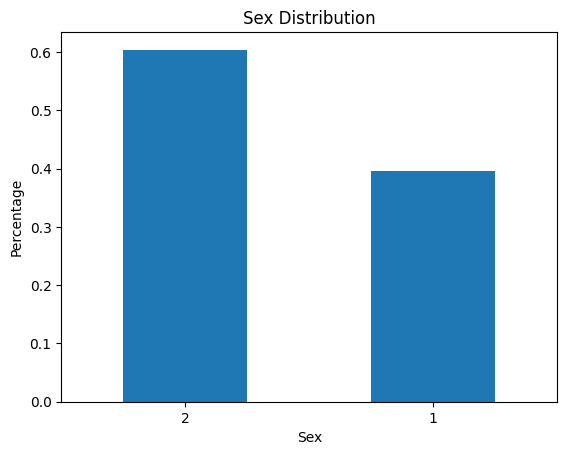

In [399]:
sex = df['SEX']

males = df[sex == 1]
females = df[sex == 2]

proportion_males = len(males) / len(df)
proportion_females = len(females) / len(df)

print("Proportion of males: ", proportion_males)
print("Proportion of females: ", proportion_females)

counted = sex.value_counts(normalize=True)
counted.plot.bar()

plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


## Age distribution

In [400]:
age = df['AGE']
age.describe()

count   30000.000000
mean       35.485500
std         9.217904
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        79.000000
Name: AGE, dtype: float64

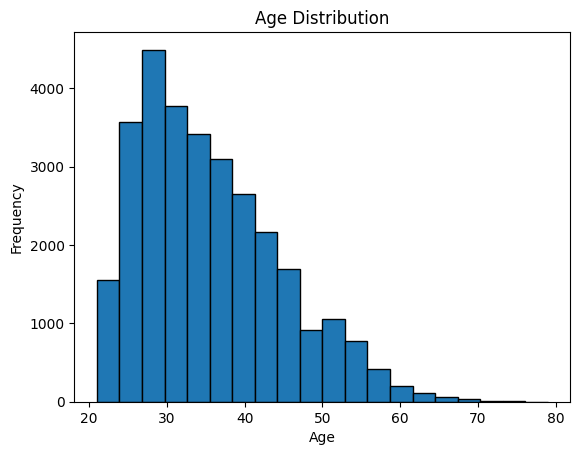

In [401]:
plt.hist(age, bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

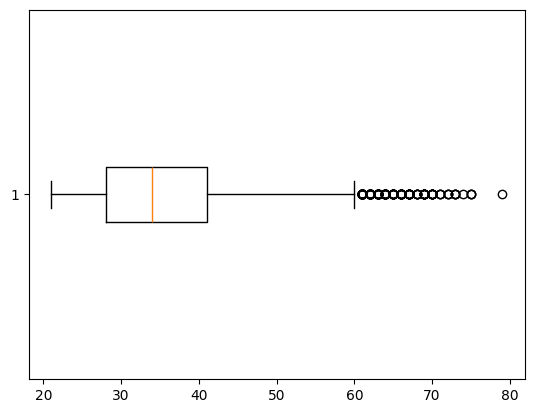

In [402]:
plt.boxplot(age, vert=False)
plt.show()

## Limit balance

In [403]:
limit_balance = df['LIMIT_BAL']
limit_balance.describe()


count     30000.000000
mean     167484.322667
std      129747.661567
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max     1000000.000000
Name: LIMIT_BAL, dtype: float64

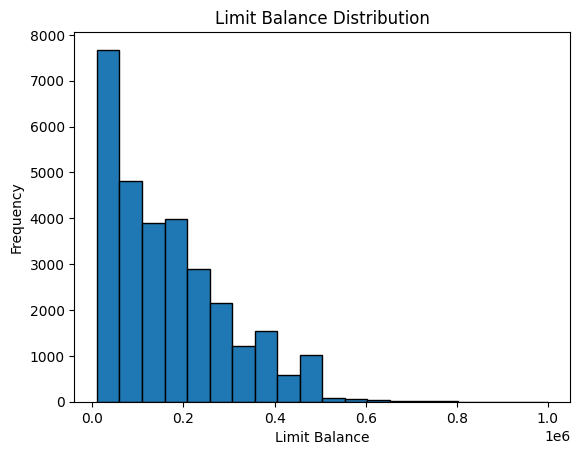

In [404]:
plt.hist(limit_balance, bins=20, edgecolor='black')
plt.title('Limit Balance Distribution')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.show()

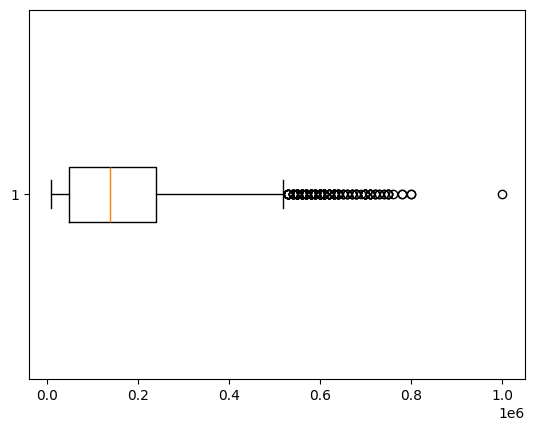

In [405]:
plt.boxplot(limit_balance, vert=False)
plt.show()



## Defaults

In [406]:
# Visualize the default payment next month
default_payment = df['default payment next month']
default_payment.describe()

count   30000.000000
mean        0.221200
std         0.415062
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default payment next month, dtype: float64

counted:  default payment next month
0   0.778800
1   0.221200
Name: proportion, dtype: float64


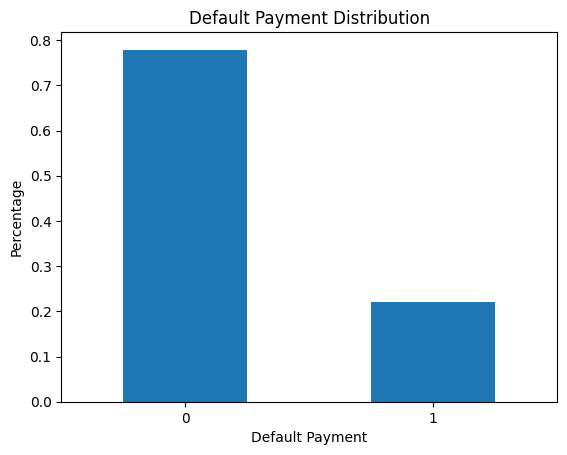

In [407]:
counted = default_payment.value_counts(normalize=True)

print("counted: ", counted)

counted.plot.bar()

plt.title('Default Payment Distribution')
plt.xlabel('Default Payment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

## Correlations

                     statistics  p_values  dof
EDUCATION            162.167785  0.000000    6
LIMIT_BAL_Q          819.016214  0.000000    3
PAY_0               5365.964977  0.000000   10
WEIGHTED_PAY_AMT_Q   891.338988  0.000000    3
AGE_Q                 60.569113  0.000000    3
SEX                   47.905433  0.000000    1
MARRIAGE              35.662396  0.000000    3
WEIGHTED_BILL_AMT_Q   22.177517  0.000060    3


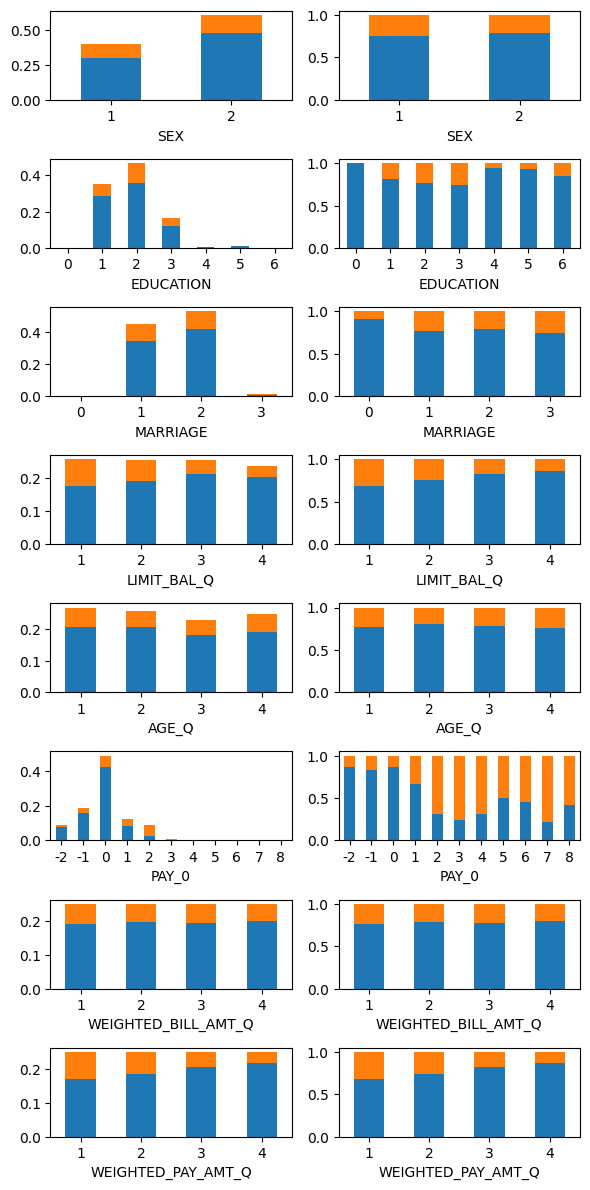

In [408]:
from matplotlib import gridspec

def drawBarCharts(df, keys):

    gs = gridspec.GridSpec(len(keys), 2)
    fig = plt.figure(figsize=(6,12))
    
    statistics = []
    p_values = []
    dof = []

    for i, key in enumerate(keys):

        ax = fig.add_subplot(gs[i, 0])      
         
        normalized_table = pd.crosstab(df[key], df['default payment next month'], margins = False, normalize=True)
        normalized_table.plot(kind='bar', stacked=True, ax=ax, 
                    xlabel=key, 
                    legend=False)
        ax.tick_params(axis='x', labelrotation=0)

        ax = fig.add_subplot(gs[i, 1])      

        raw_table = pd.crosstab(df[key], df['default payment next month'], margins = False)
        contingency_pct = raw_table.div(raw_table.sum(axis=1), axis=0)
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, 
                    xlabel=key,
                    legend=False)
        ax.tick_params(axis='x', labelrotation=0)

        sm_table = sm.stats.Table(raw_table)  # ← FIX: Use raw_table, not normalized
        X2 = sm_table.test_nominal_association() 

        # print("X2: ", X2)

        statistics.append(X2.statistic)
        p_values.append(X2.pvalue)
        dof.append(X2.df)
        

    fig.tight_layout()


    dataframe = pd.DataFrame({'statistics': statistics, 'p_values': p_values, 'dof': dof}, index=keys)

    # sort ascending by p_values
    dataframe = dataframe.sort_values(by='p_values', ascending=True)

    return dataframe

keys = ['SEX', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL_Q', 'AGE_Q', 'PAY_0', 'WEIGHTED_BILL_AMT_Q', 'WEIGHTED_PAY_AMT_Q']
dataframe = drawBarCharts(df, keys)

print(dataframe)

plt.show()
    

# Results


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm 



model = smf.glm('default_status ~ LIMIT_BAL_Q + SEX + EDUCATION + MARRIAGE + AGE_Q + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 + WEIGHTED_BILL_AMT_Q + WEIGHTED_PAY_AMT_Q', data=train_df, family=sm.families.Binomial())

model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         default_status   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9518.5
Date:                Wed, 18 Jun 2025   Deviance:                       19037.
Time:                        16:28:40   Pearson chi2:                 2.37e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1346
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2600      0.135      1.929      0.054      -0.004       0.524
LIMIT_BAL_Q            -0.0402      0.020     -2.031      0.042      -0.079      -0.001
SEX                    -0.0967      0.037     -2.593      0.010      -0.170      -0.024
EDUCATION              -0.0743      0.025     -2.940      0.003      -0.124      -0.025
MARRIAGE               -0.1556      0.039     -4.004      0.000      -0.232      -0.079
AGE_Q                   0.0485      0.018      2.691      0.007       0.013       0.084
PAY_0                   0.5877      0.021     27.889      0.000       0.546       0.629
PAY_2                   0.1104      0.024      4.629      0.000       0.064       0.157
PAY_3                   0.1036      0.026      3.940      0.000       0.052       0.155
PAY_4                   0.0120      0.030      0.404      0.686      -0.046       0.070
PAY_5                   0.0736      0.032      2.330      0.020       0.012       0.136
PAY_6                   0.0711      0.026      2.731      0.006       0.020       0.122
WEIGHTED_BILL_AMT_Q    -0.2486      0.024    -10.418      0.000      -0.295      -0.202
WEIGHTED_PAY_AMT_Q     -0.2010      0.023     -8.649      0.000      -0.247      -0.155
=======================================================================================
"""

The model gives us the estimated effect for each explanatory variable, along with a set of metrics which indicate the statistical significance of the effect and their confidence levels.

These metrics are:
- the standard error
- the z-score
- the p-value
- the confidence interval

The standard error measure the sampling distribution's normalized deviation around the true proportion of defaults if the effect for that variable was 0 (adjusting for the effect of all other variables), a phenomenon denoted as:

$$H_{0}: \beta_{i}=0$$

and the z-score gives us the amount of standard errors away from where it would be under $H_{0}$. The larger the z-score, the less likely it is due to normal sampling variations.

The p-value gives us the probability of arriving to an effect of that magnitude if the true effect was 0 (adjusting for the effects of all the other variables). In this study, we use alpha = 0.05 therefore all p-values below 0.05 indicate that the effect is statistically significant.

### Statistical Significance Analysis
Using the established alpha = 0.05 threshold, the following variables show statistically significant effects:

**Highly Significant (p < 0.001):**
- `PAY_0` (p < 0.001): Most recent payment status - strongest predictor
- `MARRIAGE` (p < 0.001): Marital status 
- `WEIGHTED_BILL_AMT_Q` (p < 0.001): Consolidated bill amounts
- `WEIGHTED_PAY_AMT_Q` (p < 0.001): Consolidated payment amounts

**Moderately Significant (p < 0.01):**
- `EDUCATION` (p = 0.003): Education level
- `AGE_Q` (p = 0.007): Age quartiles
- `SEX` (p = 0.010): Gender
- `PAY_6` (p = 0.006): Payment status 6 months ago

**Marginally Significant (p < 0.05):**
- `PAY_2` (p < 0.001), `PAY_3` (p < 0.001), `PAY_5` (p = 0.020): Payment history variables
- `LIMIT_BAL_Q` (p = 0.042): Credit limit quartiles

**Not Significant:**
- `PAY_4` (p = 0.686): Payment status 4 months ago shows no significant effect

### Coefficient Interpretation and Odds Ratios

Following the notebook's framework where odds ratio = e^(coefficient):

**Risk-Increasing Factors (Positive Coefficients):**
- `PAY_0` (coef = 0.5877): Odds ratio = e^0.5877 ≈ 1.80
  - Each unit increase in recent payment delinquency increases default odds by 80%
- `AGE_Q` (coef = 0.0485): Odds ratio = e^0.0485 ≈ 1.05
  - Higher age quartiles slightly increase default risk

**Risk-Decreasing Factors (Negative Coefficients):**
- `WEIGHTED_BILL_AMT_Q` (coef = -0.2486): Odds ratio = e^-0.2486 ≈ 0.78
  - Higher bill amounts reduce default odds by 22% per quartile
- `WEIGHTED_PAY_AMT_Q` (coef = -0.2010): Odds ratio = e^-0.2010 ≈ 0.82
  - Higher payment amounts reduce default odds by 18% per quartile
- `MARRIAGE` (coef = -0.1556): Odds ratio = e^-0.1556 ≈ 0.86
  - Marriage status reduces default risk by 14%

### Key Insights

1. **Payment Behavior Dominance**: `PAY_0` has the largest coefficient (0.5877) and highest z-score (27.889), confirming that recent payment status is the strongest predictor of default risk.

2. **Protective Effect of Higher Amounts**: Both consolidated bill and payment amounts show negative coefficients, suggesting that customers with higher financial activity are less likely to default - possibly indicating better financial capacity.

3. **Demographic Factors**: Marriage, education, and gender all show protective effects against default, while age shows a slight increase in risk at higher quartiles.

4. **Payment History Gradient**: The coefficients for payment history variables generally decrease in magnitude as they get older (PAY_0 > PAY_2 > PAY_3), with PAY_4 showing no significant effect, confirming that recent payment behavior is more predictive than distant history.

## Model Evaluation

Now that we have fitted the logistic regression model on the training set, we need to evaluate its performance on the test set to assess how well it generalizes to unseen data. We will use several key metrics to evaluate the model's classification performance:

- **Accuracy**: Overall proportion of correct predictions
- **Sensitivity (Recall)**: Proportion of actual defaults correctly identified
- **Specificity**: Proportion of actual non-defaults correctly identified
- **F1-Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Detailed breakdown of predictions vs actual outcomes
- **AUC-ROC**: Area under the receiver operating characteristic curve


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model to get the fitted object
fitted_model = model.fit()

# Generate predictions on test set
# Get predicted probabilities
test_probabilities = fitted_model.predict(test_df)

# Convert probabilities to binary predictions using 0.5 threshold
test_predictions = (test_probabilities > 0.5).astype(int)

# Get actual values
test_actual = test_df['default_status'].values

print(f"Test set size: {len(test_df)}")
print(f"Number of actual defaults in test set: {sum(test_actual)}")
print(f"Number of predicted defaults: {sum(test_predictions)}")
print(f"Sample of predicted probabilities: {test_probabilities[:10].round(3)}")
print(f"Sample of binary predictions: {test_predictions[:10]}")
print(f"Sample of actual values: {test_actual[:10]}")


Test set size: 9000
Number of actual defaults in test set: 2039
Number of predicted defaults: 781
Sample of predicted probabilities: 1     0.250
9     0.064
11    0.088
13    0.373
16    0.356
18    0.324
24    0.246
25    0.181
40    0.111
48    0.068
dtype: float64
Sample of binary predictions: 1     0
9     0
11    0
13    0
16    0
18    0
24    0
25    0
40    0
48    0
dtype: int64
Sample of actual values: [1 0 0 1 1 0 0 0 0 0]


### Step 2: Confusion Matrix

The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class. In credit default prediction:

- **True Positives (TP)**: Correctly predicted defaults
- **True Negatives (TN)**: Correctly predicted non-defaults  
- **False Positives (FP)**: Incorrectly predicted defaults (Type I error)
- **False Negatives (FN)**: Incorrectly predicted non-defaults (Type II error)

|                | Predicted |           |
|----------------|-----------|-----------|
| **Actual**     | No Default| Default   |
| **No Default** | TN        | FP        |
| **Default**    | FN        | TP        |


Confusion Matrix:
[[6696  265]
 [1523  516]]

Breakdown:
True Negatives (TN): 6696
False Positives (FP): 265
False Negatives (FN): 1523
True Positives (TP): 516


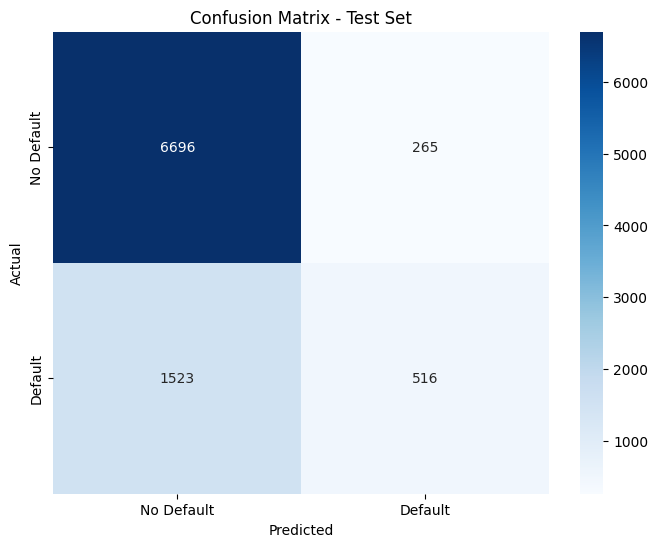

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(test_actual, test_predictions)
print("Confusion Matrix:")
print(cm)

# Extract components
tn, fp, fn, tp = cm.ravel()
print(f"\nBreakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Create heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Step 3: Calculate Performance Metrics

Now we'll calculate the key performance metrics using the confusion matrix components:


In [ ]:
# Calculate all performance metrics
accuracy = accuracy_score(test_actual, test_predictions)
precision = precision_score(test_actual, test_predictions)
sensitivity_recall = recall_score(test_actual, test_predictions)  # Same as sensitivity
f1 = f1_score(test_actual, test_predictions)

# Calculate specificity manually (no direct sklearn function)
specificity = tn / (tn + fp)

print("=== MODEL PERFORMANCE METRICS ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Sensitivity (Recall): {sensitivity_recall:.4f} ({sensitivity_recall*100:.2f}%)")
print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"F1-Score: {f1:.4f}")

print("\n=== METRIC INTERPRETATIONS ===")
print(f"• Accuracy: {accuracy*100:.1f}% of all predictions were correct")
print(f"• Precision: {precision*100:.1f}% of predicted defaults were actually defaults")
print(f"• Sensitivity: {sensitivity_recall*100:.1f}% of actual defaults were correctly identified")
print(f"• Specificity: {specificity*100:.1f}% of actual non-defaults were correctly identified")
print(f"• F1-Score: Harmonic mean of precision and recall = {f1:.3f}")


=== MODEL PERFORMANCE METRICS ===
Accuracy: 0.8013 (80.13%)
Precision: 0.6607 (66.07%)
Sensitivity (Recall): 0.2531 (25.31%)
Specificity: 0.9619 (96.19%)
F1-Score: 0.3660

=== METRIC INTERPRETATIONS ===
• Accuracy: 80.1% of all predictions were correct
• Precision: 66.1% of predicted defaults were actually defaults
• Sensitivity: 25.3% of actual defaults were correctly identified
• Specificity: 96.2% of actual non-defaults were correctly identified
• F1-Score: Harmonic mean of precision and recall = 0.366


### Step 4: ROC Curve and AUC Analysis

The ROC (Receiver Operating Characteristic) curve plots the trade-off between sensitivity and specificity across different probability thresholds. The AUC (Area Under the Curve) provides a single metric to assess the model's discriminatory ability:

- **AUC = 1.0**: Perfect classifier
- **AUC = 0.5**: Random classifier (no discriminatory ability)
- **AUC < 0.5**: Worse than random (but could be inverted)

Generally:
- AUC > 0.8: Good classifier
- AUC > 0.9: Excellent classifier


AUC-ROC Score: 0.7242


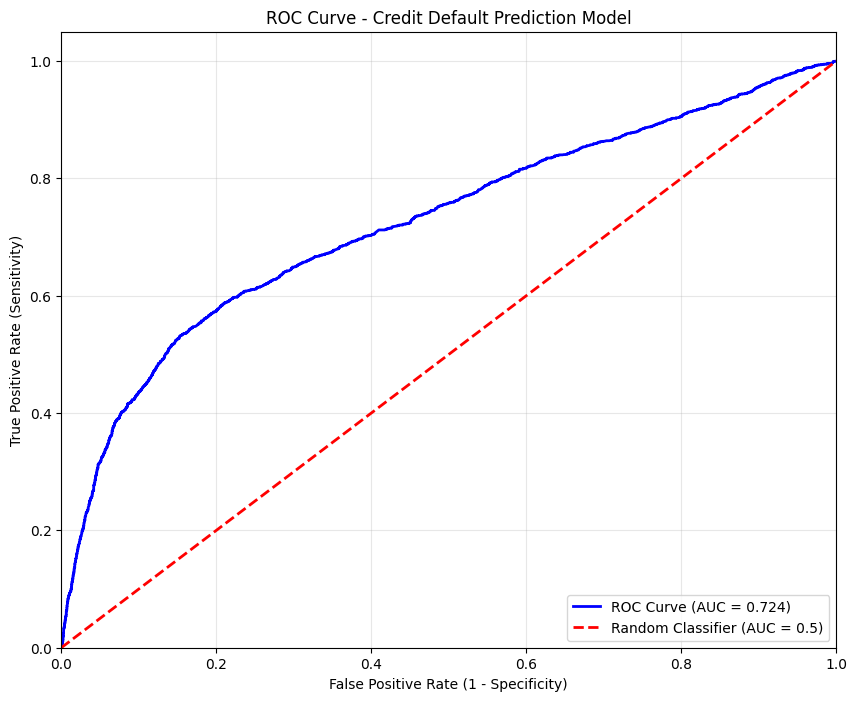


=== AUC INTERPRETATION ===
AUC = 0.724 indicates Fair discriminatory ability


In [ ]:
# Calculate AUC
auc = roc_auc_score(test_actual, test_probabilities)
print(f"AUC-ROC Score: {auc:.4f}")

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(test_actual, test_probabilities)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve - Credit Default Prediction Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n=== AUC INTERPRETATION ===")
if auc >= 0.9:
    interpretation = "Excellent"
elif auc >= 0.8:
    interpretation = "Good"
elif auc >= 0.7:
    interpretation = "Fair"
elif auc >= 0.6:
    interpretation = "Poor"
else:
    interpretation = "Very Poor"
    
print(f"AUC = {auc:.3f} indicates {interpretation} discriminatory ability")


### Step 5: Business Context Analysis

In credit default prediction, different types of errors have different business implications:

**False Positives (Type I Error):**
- Predict default when customer won't default
- Business impact: Lost revenue from rejected good customers
- Cost: Opportunity cost of lost business

**False Negatives (Type II Error):**
- Predict no default when customer will default  
- Business impact: Financial loss from bad debt
- Cost: Direct monetary loss from unpaid loans

The optimal threshold and metric emphasis depends on the business strategy and risk tolerance of the financial institution.


In [ ]:
# Threshold analysis - evaluate performance at different thresholds
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]

print("=== THRESHOLD ANALYSIS ===")
print(f"{'Threshold':<10} {'Accuracy':<10} {'Precision':<11} {'Sensitivity':<12} {'Specificity':<12} {'F1-Score':<10}")
print("-" * 70)

best_f1 = 0
best_threshold = 0.5

for threshold in thresholds_to_test:
    # Generate predictions with current threshold
    current_predictions = (test_probabilities > threshold).astype(int)
    
    # Calculate metrics
    curr_accuracy = accuracy_score(test_actual, current_predictions)
    curr_precision = precision_score(test_actual, current_predictions, zero_division=0)
    curr_sensitivity = recall_score(test_actual, current_predictions)
    curr_f1 = f1_score(test_actual, current_predictions, zero_division=0)
    
    # Calculate specificity
    curr_cm = confusion_matrix(test_actual, current_predictions)
    if curr_cm.shape == (2, 2):
        curr_tn, curr_fp, curr_fn, curr_tp = curr_cm.ravel()
        curr_specificity = curr_tn / (curr_tn + curr_fp) if (curr_tn + curr_fp) > 0 else 0
    else:
        curr_specificity = 0
    
    print(f"{threshold:<10.1f} {curr_accuracy:<10.3f} {curr_precision:<11.3f} {curr_sensitivity:<12.3f} {curr_specificity:<12.3f} {curr_f1:<10.3f}")
    
    # Track best F1 score
    if curr_f1 > best_f1:
        best_f1 = curr_f1
        best_threshold = threshold

print(f"\nOptimal threshold based on F1-Score: {best_threshold} (F1 = {best_f1:.3f})")


=== THRESHOLD ANALYSIS ===
Threshold  Accuracy   Precision   Sensitivity  Specificity  F1-Score  
----------------------------------------------------------------------
0.3        0.782      0.518       0.507        0.862        0.512     
0.4        0.806      0.615       0.386        0.929        0.474     
0.5        0.801      0.661       0.253        0.962        0.366     
0.6        0.791      0.698       0.137        0.983        0.229     
0.7        0.784      0.738       0.071        0.993        0.129     

Optimal threshold based on F1-Score: 0.3 (F1 = 0.512)


### Step 6: Model Evaluation Summary

**Key Evaluation Questions Answered:**

1. **How accurate is the model overall?** 
   - Measured by accuracy score - proportion of correct predictions

2. **How good is the model at identifying defaults?**
   - Measured by sensitivity/recall - proportion of actual defaults correctly identified
   
3. **How good is the model at identifying non-defaults?**
   - Measured by specificity - proportion of actual non-defaults correctly identified

4. **When the model predicts default, how often is it right?**
   - Measured by precision - proportion of predicted defaults that are actually defaults

5. **What's the balance between precision and recall?**
   - Measured by F1-score - harmonic mean providing single balanced metric

6. **How well can the model distinguish between classes?**
   - Measured by AUC-ROC - discriminatory ability across all thresholds

The confusion matrix provides the foundation for understanding all these metrics by showing the detailed breakdown of prediction outcomes.
